## Steps in this notebook:

#### 1. Data Extraction
- Load data using pandas

#### 2. Data Analysis
- Descriptive analysis (describe)
- Info - Columns details

#### 3. Data Wrangling
- Missing values - identification and fixing
- Outliers - identification and fixing
- Any other wrong values - ?, blanks, etc to be treated
- Column names

#### 4. Feature Engineering 
- Add new columns if needed (like age range)
- Drop unwanted columns

#### 5. Data Visualization (EDA)
- Univariate analysis for categorical and numerical data/target variable
- Bivariate analysis for categorical and numerical data with target variable
- We won't check correlations here as Logistic regression is okay with correlations
- Any other plots to analyse data

#### 6. Feature Encoding
- Encoding using get_dummies or manual encoding
- Encode Categorical values using Label Encoder if no of unique values less than 25
- Encode Categorical values using One hot Encoder if no of unique values less than 3

#### 7. Feature Scaling
- Using MinMaxScaler

#### 8. Split Data
- Train test split (or)
- Cross validation

#### 9. Model (let's try different models)
- Classifier - LogisiticRegression, DecisionTree, RandomForest, SVC, SGD, KNeighbors, GaussianNB, AdaBoost, XGBoost

#### 10. Model Evaluation
- Accuracy/roc curve/auc/precision/recall/confusion matrix/f1 score/average precision recall

#### 11. Fine Tune the Model if possible and re-evalute Model
- Tuning methods

#### 12. Feature Importance
- Find all features which contribute to Churn predominantly

In [92]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Data Extraction

In [160]:
tel = pd.read_csv('../../data/churn/WA_Fn-UseC_-Telco-Customer-Churn.csv')

## 2. Data Analysis

In [94]:
tel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [95]:
pd.set_option('display.max_rows',500)
pd.set_option('display.max_columns',500)

In [96]:
tel.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No


### 3. Data Wrangling

In [97]:
tel['TotalCharges'] = pd.to_numeric(tel['TotalCharges'],errors='coerce')

In [98]:
tel['TotalCharges'].dtypes

dtype('float64')

In [99]:
tel.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

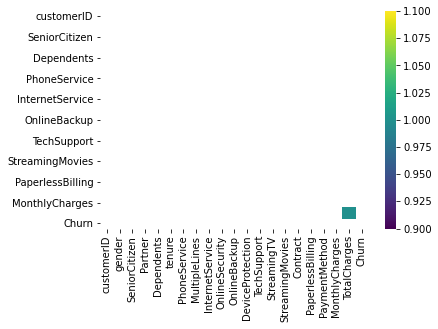

In [100]:
sns.heatmap(tel.isnull().corr(),cmap='viridis')

In [101]:
# Lets check the rows related to the missing TotalCharges value
tel[tel['TotalCharges'].isnull()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [102]:
tel[tel['tenure']==0]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [103]:
# We can observe wherever we have totalcharges as 0, tenure is 0 as well, means NaN should be 0. Lets replace that
tel['TotalCharges'][tel['TotalCharges'].isna()] = 0

<ipython-input-103-b24859fdd704>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tel['TotalCharges'][tel['TotalCharges'].isna()] = 0


In [104]:
# Lets chk data now
tel[tel['TotalCharges'].isnull()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


In [105]:
tel.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No


In [106]:
# Lets rename some cols to proper names
tel.rename(columns={'gender':'Gender','tenure':'Tenure'},inplace=True)

In [107]:
tel.head(2)

,customerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No


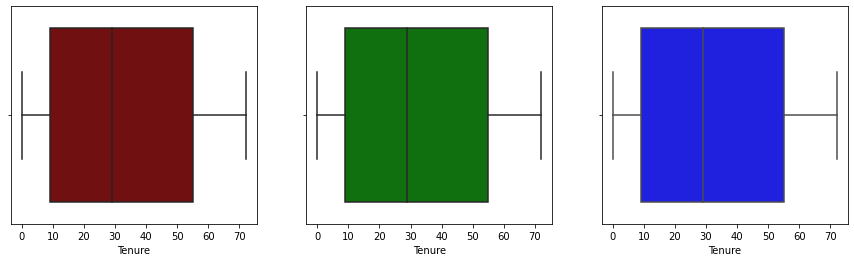

In [108]:
# Check for outliers in numerical columns
fig,axes = plt.subplots(1,3,figsize=(15,4))
sns.boxplot(tel['Tenure'],ax=axes[0],color='maroon')
sns.boxplot(tel['Tenure'],ax=axes[1],color='green')
sns.boxplot(tel['Tenure'],ax=axes[2],color='blue')
plt.show()

## 4. Feature Engineering

In [109]:
tel.head(3)

,customerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


(array([1612.,  759.,  570.,  556.,  495.,  494.,  452.,  495.,  501.,
        1109.]),
 array([ 0. ,  7.2, 14.4, 21.6, 28.8, 36. , 43.2, 50.4, 57.6, 64.8, 72. ]),
 <a list of 10 Patch objects>)

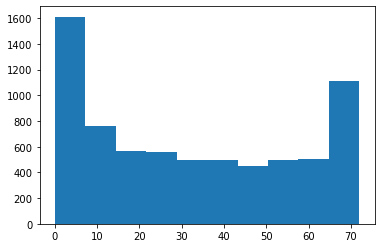

In [110]:
plt.hist(tel['Tenure'])

In [111]:
bins=[0,10,20,30,40,50,60,70]
tel['Tenure_range'] = pd.cut(tel['Tenure'],bins)
tel.head(2)

,customerID,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Tenure_range
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,"(0, 10]"
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,"(30, 40]"


In [112]:
tel.drop('customerID',inplace=True,axis=1)

In [113]:
tel.head(2)

,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Tenure_range
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,"(0, 10]"
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,"(30, 40]"


## 5. Data Visualization (EDA)

####  Univariate Analysis - Numerical

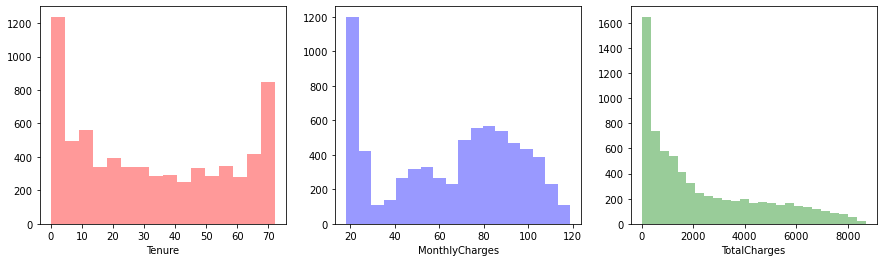

In [114]:
# Numerical columns - Tenure, MonthlyCharges & TotalCharges
fig,axes=plt.subplots(1,3,figsize=(15,4))
sns.distplot(tel['Tenure'],kde=False,color='red',ax=axes[0])
sns.distplot(tel['MonthlyCharges'],kde=False,color='blue',ax=axes[1])
sns.distplot(tel['TotalCharges'],kde=False,color='green',ax=axes[2])
plt.show()

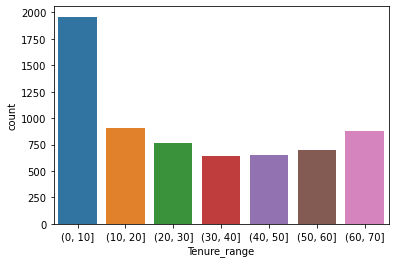

In [115]:
sns.countplot(tel['Tenure_range'])

######  Observations:-
- Most customers have stayed for less than 10 years
- For 10 to 60 years tenure the dsitribution is even (mostly count is around 500-1000)
- There are good number of customers who have stayed for more than 60 years too
- Most customers have taken basic package of 20 dollars
- Mixed packages are mostly taken around range of 70-110 dollars
- Most people have taken only 1 month of subscription and left

#### Univariate analysis - Categorical variables

In [116]:
tel.columns

Index(['Gender', 'SeniorCitizen', 'Partner', 'Dependents', 'Tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn', 'Tenure_range'],
      dtype='object')

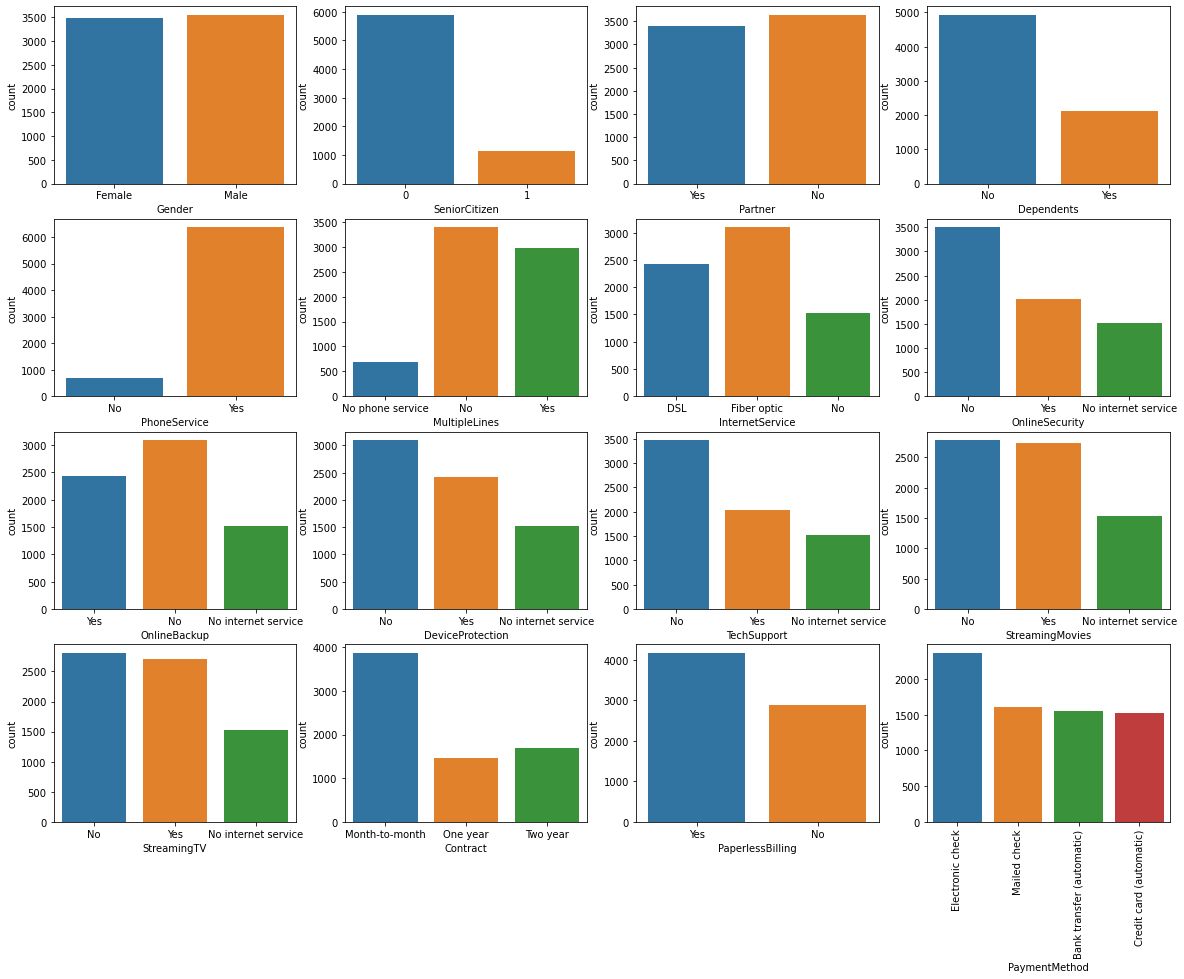

In [117]:
# Lets see categorical variables distribution using countplot
fig,axes=plt.subplots(4,4,figsize=(20,15))
sns.countplot(tel['Gender'],ax=axes[0][0])
sns.countplot(tel['SeniorCitizen'],ax=axes[0][1])
sns.countplot(tel['Partner'],ax=axes[0][2])
sns.countplot(tel['Dependents'],ax=axes[0][3])
sns.countplot(tel['PhoneService'],ax=axes[1][0])
sns.countplot(tel['MultipleLines'],ax=axes[1][1])
sns.countplot(tel['InternetService'],ax=axes[1][2])
sns.countplot(tel['OnlineSecurity'],ax=axes[1][3])
sns.countplot(tel['OnlineBackup'],ax=axes[2][0])
sns.countplot(tel['DeviceProtection'],ax=axes[2][1])
sns.countplot(tel['TechSupport'],ax=axes[2][2])
sns.countplot(tel['StreamingMovies'],ax=axes[2][3])
sns.countplot(tel['StreamingTV'],ax=axes[3][0])
sns.countplot(tel['Contract'],ax=axes[3][1])
sns.countplot(tel['PaperlessBilling'],ax=axes[3][2])
sns.countplot(tel['PaymentMethod'],ax=axes[3][3])
plt.xticks(rotation=90)
plt.show()

#### Observations:-
- Equal num of Male and Female
- Less no of Senior citizens
- Equal no of people have partner and no partner
- Most customers dont have dependents
- Most customers have Phoneservices
- Most customers do not have multiplelines
- Majority of customers have taken fiber services, and there are good amount of DSL customers as well
- Most customers have opted out of OnlineSecurity, OnlineBackup, DeviceProtection and TechSupport
- Equal no of customers have subscribed for Movies and TV
- Most customers have taken Monthly Subscription
- Most customers opted PaperlessBilling and Electronic cheque is most opted payment type

#### Let's see how Churn is distributed

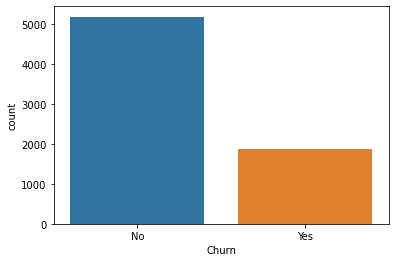

In [118]:
sns.countplot(tel['Churn'])
# Imbalanced data - Most people have not churned, our outcomes are not equally distributed, we must handle this

### Bivariate Analysis

#### Bivariate Analysis of Numeric data vs Churn

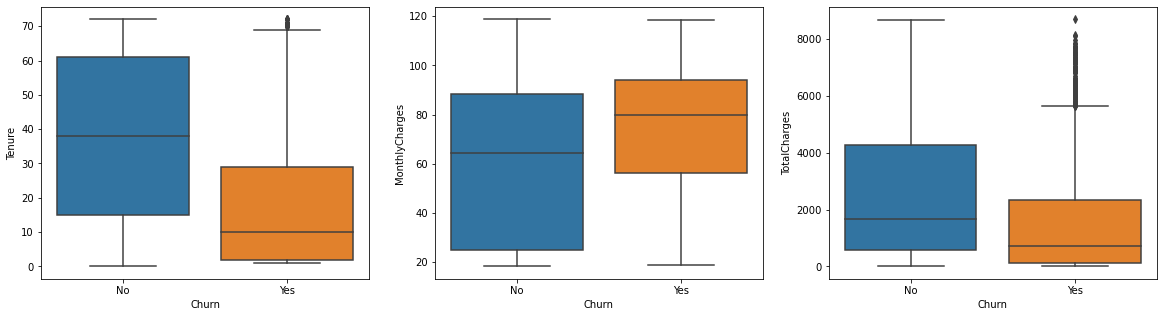

In [119]:
# boxplot x vs y
fig,axes=plt.subplots(1,3,figsize=(20,5))
sns.boxplot('Churn','Tenure',data=tel,ax=axes[0])
sns.boxplot('Churn','MonthlyCharges',data=tel,ax=axes[1])
sns.boxplot('Churn','TotalCharges',data=tel,ax=axes[2])

#### Observations:
- No outliers as checked earlier
- Most customers who have churned are the ones who have tenure around 10 years
- Most customers who have high monthly bill have churned more than lower monthly bill
- Seems to have some outliers in TotalCharges

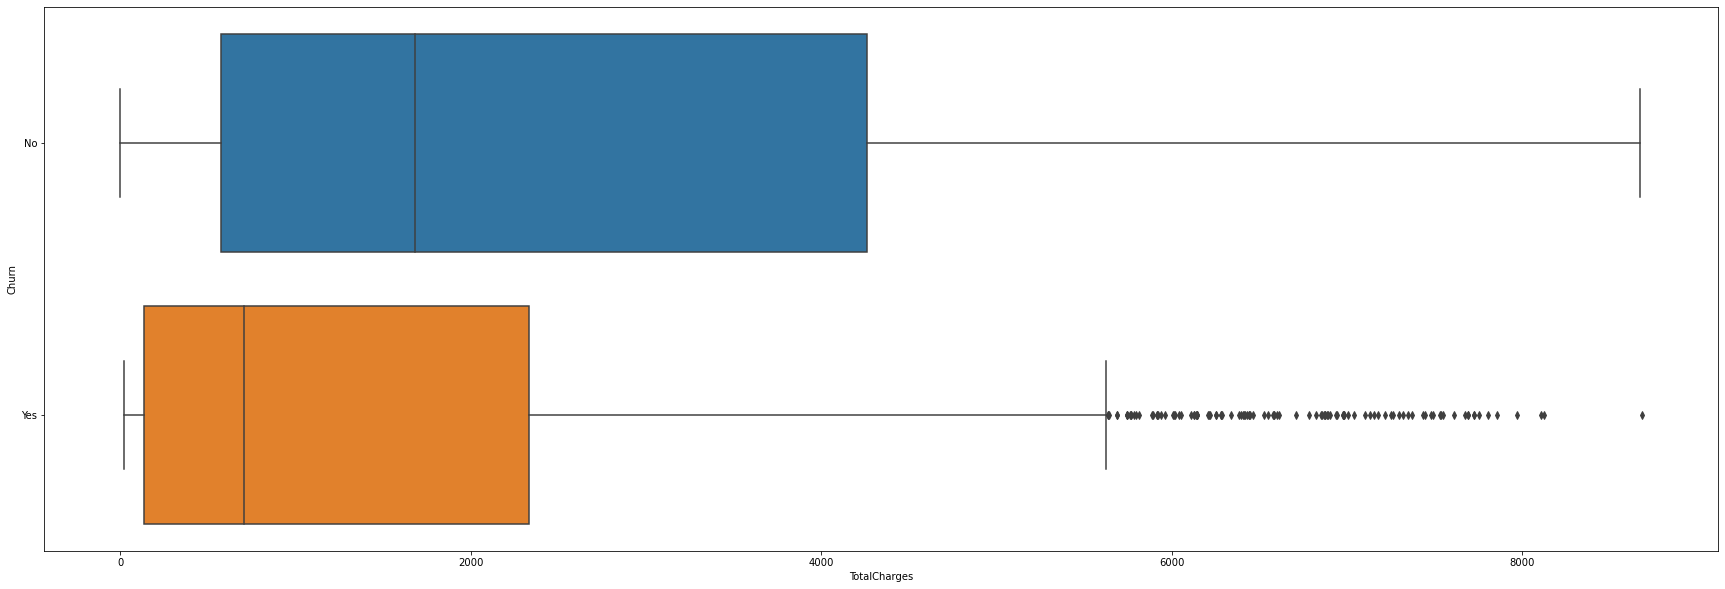

In [120]:
plt.figure(figsize=(30,10))
sns.boxplot(tel['TotalCharges'],tel['Churn'])

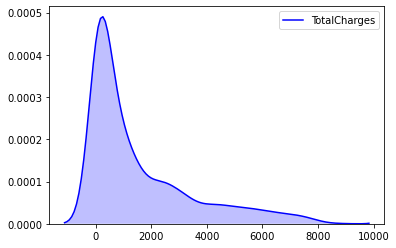

In [121]:
sns.kdeplot(tel['TotalCharges'][(tel['Churn']=='Yes')],color='blue',shade='True')

## 6. Feature Encoding

In [122]:
tel.head(2)

,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Tenure_range
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,"(0, 10]"
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,"(30, 40]"


In [123]:
tel.drop('Tenure_range',axis=1,inplace=True)

In [124]:
tel.head(2)

,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No


In [125]:
# We must encode all categorical variables - in such a way that less than 3 uniq ones can be one hot encoded, rest can be 
# label encoded incase count of uniq values is less than 25
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cat_cols = tel.select_dtypes(exclude=np.number).columns

In [126]:
tel[cat_cols] = tel[cat_cols].apply(lambda col: le.fit_transform(col))
tel.shape

(7043, 20)

In [127]:
tel.head(10)

,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1
5,0,0,0,0,8,1,2,1,0,0,2,0,2,2,0,1,2,99.65,820.50,1
6,1,0,0,1,22,1,2,1,0,2,0,0,2,0,0,1,1,89.10,1949.40,0
7,0,0,0,0,10,0,1,0,2,0,0,0,0,0,0,0,3,29.75,301.90,0
8,0,0,1,0,28,1,2,1,0,0,2,2,2,2,0,1,2,104.80,3046.05,1
9,1,0,0,1,62,1,0,0,2,2,0,0,0,0,1,0,0,56.15,3487.95,0


In [128]:
# We can see there are not many categories, so label encoding is enough. We need not do one hot encoding

## 7. Feature Scaling

In [129]:
# We can see 3 columns, tenure, MonthlyCharges and TotalCharges are having bit higher values in 
# comparison to other columns, so we have to scale them, we will use MinMaxScaler

In [130]:
from sklearn.model_selection import train_test_split
y=tel.Churn
X=tel.drop(columns='Churn')

In [131]:
from sklearn.preprocessing import MinMaxScaler
features = X.columns.values
scaler=MinMaxScaler(feature_range=(0,1))
scaler.fit(X)
X=pd.DataFrame(scaler.transform(X))
X.columns = features
X.head(2)

,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0.0,0.0,1.0,0.0,0.013889,0.0,0.5,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.666667,0.115423,0.003437
1,1.0,0.0,0.0,0.0,0.472222,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.5,0.0,1.000000,0.385075,0.217564


## 8. Train test split

In [132]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=40)

In [133]:
(y_test.value_counts()[0] / y_test.shape)[0]

0.7349739706578324

In [134]:
# above says that 0 - means not churned has more records than churned, so its imbalanced, means when we say all our
# customers havent churned, means we have an accuracy of 73.5%

#### Under Sampling

In [135]:
from imblearn.over_sampling import SMOTE
from sklearn.metrics import DistanceMetric

smote=SMOTE()
X_train_smote,y_train_smote = smote.fit_resample(X_train.astype('float'),y_train)

In [136]:
from collections import Counter
print('Before SMOTE: ',Counter(y_train))
print('After SMOTE: ',Counter(y_train_smote))

Before SMOTE:  Counter({0: 3621, 1: 1309})
After SMOTE:  Counter({0: 3621, 1: 3621})


## 9. Model Building

### 9a. Logistic Regression

In [225]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
lr = LogisticRegression()
lr.fit(X_train_smote,y_train_smote)
lr.predict(X_test)
lr_acc = metrics.accuracy_score(y_test,y_pred_lr)
lr_acc

0.7382867960246096

In [172]:
X.columns

Index(['Gender', 'SeniorCitizen', 'Partner', 'Dependents', 'Tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges'],
      dtype='object')

In [173]:
lr.coef_[0]

array([-6.39114862e-02,  1.05641919e-01, -2.67052299e-02, -3.05650875e-01,
       -3.68664046e+00, -1.14126442e+00,  9.70296559e-02,  5.80194610e-01,
       -6.21314738e-01, -3.66978703e-01, -2.76745652e-01, -5.15383877e-01,
        1.14109905e-01, -1.18122110e-03, -1.38531033e+00,  2.75933012e-01,
        2.89628217e-01,  2.67095215e+00,  1.85578469e+00])

In [174]:
weights = pd.Series(lr.coef_[0],X.columns.values)
weights

Gender             -0.063911
SeniorCitizen       0.105642
Partner            -0.026705
Dependents         -0.305651
Tenure             -3.686640
PhoneService       -1.141264
MultipleLines       0.097030
InternetService     0.580195
OnlineSecurity     -0.621315
OnlineBackup       -0.366979
DeviceProtection   -0.276746
TechSupport        -0.515384
StreamingTV         0.114110
StreamingMovies    -0.001181
Contract           -1.385310
PaperlessBilling    0.275933
PaymentMethod       0.289628
MonthlyCharges      2.670952
TotalCharges        1.855785
dtype: float64

In [175]:
weights.sort_values(ascending=False)[:10]

MonthlyCharges      2.670952
TotalCharges        1.855785
InternetService     0.580195
PaymentMethod       0.289628
PaperlessBilling    0.275933
StreamingTV         0.114110
SeniorCitizen       0.105642
MultipleLines       0.097030
StreamingMovies    -0.001181
Partner            -0.026705
dtype: float64

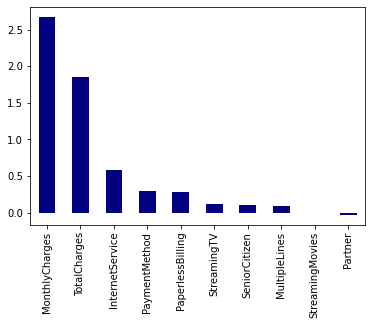

In [176]:
weights.sort_values(ascending=False)[:10].plot(kind='bar',color='navy')

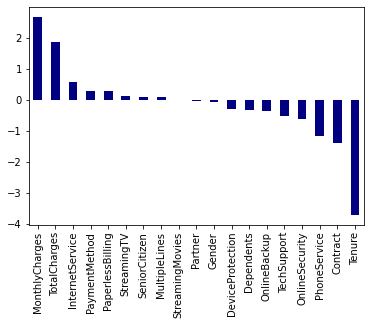

In [177]:
weights.sort_values(ascending=False).plot(kind='bar',color='navy')

#### Observations:
- Tenure seems to negatively impacting Churn
- Most customer with 2 month contract and tenure have churned least
- DSL internet service has churned lesser compared to Fiber Optic
- More the monthlycharge, lesser the Churn 

### 2. Decision Tree

In [203]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth=10)
dt.fit(X_train_smote,y_train_smote)
y_pred_dt = dt.predict(X_test)
dt_acc = metrics.accuracy_score(y_test,y_pred_dt)

0.7274017983909133


In [207]:
pd.Series(dt.feature_importances_,X.columns.values).sort_values(ascending=False)[:10]
# same order as above almost

Contract           0.485866
TotalCharges       0.083015
MonthlyCharges     0.082321
Tenure             0.072845
OnlineSecurity     0.064677
PaymentMethod      0.049082
InternetService    0.047686
Dependents         0.015839
StreamingMovies    0.014014
MultipleLines      0.011695
dtype: float64

### 3. Random Forest

In [208]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=500,oob_score=True,random_state=50,n_jobs=-1,max_features='auto',max_leaf_nodes=30)
rf.fit(X_train_smote,y_train_smote)
y_pred_rf = rf.predict(X_test)
rf_acc = metrics.accuracy_score(y_test,y_pred_rf)

0.7449124467581637


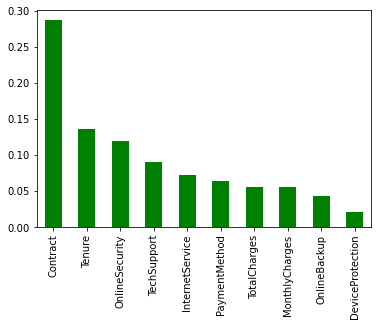

In [209]:
weights = pd.Series(rf.feature_importances_,X.columns.values)
weights.sort_values(ascending=False)[:10].plot(kind='bar',color='green')

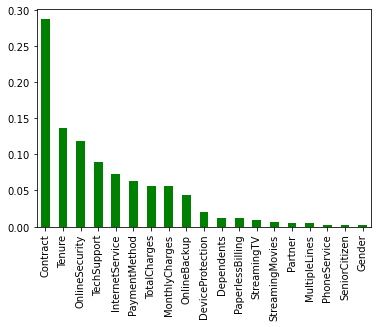

In [210]:
weights.sort_values(ascending=False).plot(kind='bar',color='green')

#### Observations:
- As before here also we see Contract and tenure majorly affecting churn
- Its similar to Logistic regression analysis, accuracy also almost same 

### 4. Support Vector Machines

In [211]:
svc=SVC(kernel='linear')
svc.fit(X_train_smote,y_train_smote)
y_pred_svc = svc.predict(X_test)
svc_acc = metrics.accuracy_score(y_test,y_pred_svc)

0.7212494084240416


### 5. Naive Bayes

In [213]:
nvb = GaussianNB()
nvb.fit(X_train_smote,y_train_smote)
y_pred_nb = nvb.predict(X_test)
nb_acc = metrics.accuracy_score(y_test,y_pred_nb)

0.7231424514907714


### 6. SGD

In [217]:
sgd=SGDClassifier()
sgd.fit(X_train_smote,y_train_smote)
y_pred_sgd = sgd.predict(X_test)
sgd_acc = metrics.accuracy_score(y_test,y_pred_sgd)

0.7283483199242783


### 7. KNeighbors

In [226]:
kn = KNeighborsClassifier()
kn.fit(X_train_smote,y_train_smote)
y_pred_kn = kn.predict(X_test)
kn_acc=metrics.accuracy_score(y_test,y_pred_kn)

### 8. AdaBoost

In [228]:
ada = AdaBoostClassifier()
ada.fit(X_train_smote,y_train_smote)
y_pred_ada = ada.predict(X_test)
ada_acc=metrics.accuracy_score(y_test,y_pred_ada)

### 9. XGBoost

In [230]:
xg = XGBClassifier()
xg.fit(X_train_smote,y_train_smote)
y_pred_xg = xg.predict(X_test)
xg_acc=metrics.accuracy_score(y_test,y_pred_xg)
xg_acc

C:\Users\ACER\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:30:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.7662091812588736

### Declaring all Classifiers, getting their metrics

In [232]:
from sklearn.linear_model  import LogisticRegression # Logistic Regression Classifier
from sklearn.linear_model import SGDClassifier # Stochastic Gradient Descent Classifier
from sklearn.tree import DecisionTreeClassifier # Decision Tree Classifier
from sklearn.ensemble  import RandomForestClassifier # Random Forest Classifier
from sklearn.neighbors import KNeighborsClassifier # K Nearest neighbors Classifier
from sklearn.naive_bayes import GaussianNB #Naive Bayes Classifier
from sklearn.svm import SVC #Support vector Machine Classifier
from sklearn.ensemble import AdaBoostClassifier # Ada Boost Classifier
from xgboost import XGBClassifier # XGBoost

In [282]:
# Making a list of all classifiers
classifier_model = [LogisticRegression(),KNeighborsClassifier(),GaussianNB(),SVC(),DecisionTreeClassifier(),
                        RandomForestClassifier(), SGDClassifier(), AdaBoostClassifier()]

# Creating empty list to store the performance details
classifier_accuracy_test = []
classifier_accuracy_train = []
f1score = []
precisionscore = []
recallscore = []
avg_pre_rec_score = []
cv_score = []
score_test_clf=[]
classifier_model_list=[]

for classifier_name in classifier_model:
    classifier = classifier_name
 
    # Fitting the training set into classification model
    classifier.fit(X_train,y_train)
    
    # Predicting the output on test datset
    y_pred_test = classifier.predict(X_test)    
    score_test = accuracy_score(y_test, y_pred_test)
    
    # Predicting the output on training datset
    y_pred_train = classifier.predict(X_train) 
    score_train = accuracy_score(y_train, y_pred_train)
    
    score_test_clf.append(score_test)
    
    # Cross Validation Score on training test
    scores = cross_val_score(classifier, X_train,y_train, cv=10)
    cv_score.append(scores.mean())
    
    #Keeping the model and accuracy score into a list
    classifier_model_list.append(classifier_name.__class__.__name__)
    classifier_accuracy_test.append(round(score_test,4))
    classifier_accuracy_train.append(round(score_train,4))
    
    #Precision, Recall and F1 score
    f1score.append(f1_score(y_test, y_pred_test))
    precisionscore.append(precision_score(y_test, y_pred_test))
    recallscore.append(recall_score(y_test, y_pred_test))
    
    #Calculating Average Precision Recall Score
    try:
        y_pred_score = classifier.decision_function(X_test)
    except:
        y_pred_score = classifier.predict_proba(X_test)[:,1]
    
    from sklearn.metrics import average_precision_score
    average_precision = average_precision_score(y_test, y_pred_score)
    avg_pre_rec_score.append(average_precision)
    
    #Confusion Matrix
#    plot_confusion_matrix(classifier_list.__class__.__name__, y_test, y_pred_test)
#    plot_prec_rec_curve(classifier_list.__class__.__name__, y_test, y_pred_score)

In [283]:
classifier_model_list

['LogisticRegression',
 'KNeighborsClassifier',
 'GaussianNB',
 'SVC',
 'DecisionTreeClassifier',
 'RandomForestClassifier',
 'SGDClassifier',
 'AdaBoostClassifier']

### Creating a DF and Table with above Metrics for Comparison

In [284]:
accuracy_df = pd.DataFrame({'Model':classifier_model_list,'Test_Accuracy':score_test_clf,'CrossValAccuracy':cv_score,
                           'Precision':precisionscore,'Recall':recallscore,'F1_Score':f1score,
                           'AveragePrecisionRecallScore':avg_pre_rec_score})
                           
# Calculating Average Accuracy = (Test + Train)/2
accuracy_df['Average_Accuracy'] =  (accuracy_df['CrossValAccuracy'] + accuracy_df['Test_Accuracy'] )/ 2


In [285]:
#Sorting the Columns based on Average Accuracy
print('\n **********************************CLASSIFICATION MODEL PERFORMANCE EVALUATION***************************************** \n') 
accuracy_df.sort_values('Average_Accuracy', axis=0, ascending=False, inplace=True) # Sorting the data with highest accuracy in the top
accuracy_df


 **********************************CLASSIFICATION MODEL PERFORMANCE EVALUATION***************************************** 



,Model,Test_Accuracy,CrossValAccuracy,Precision,Recall,F1_Score,AveragePrecisionRecallScore,Average_Accuracy
0,LogisticRegression,0.787506,0.806085,0.614433,0.532143,0.570335,0.622514,0.796796
7,AdaBoostClassifier,0.789399,0.803448,0.623126,0.519643,0.566699,0.619083,0.796424
6,SGDClassifier,0.786086,0.802028,0.624424,0.483929,0.545272,0.611500,0.794057
3,SVC,0.788452,0.798377,0.634204,0.476786,0.544343,0.600202,0.793415
5,RandomForestClassifier,0.776148,0.796957,0.596882,0.478571,0.531219,0.595174,0.786553
1,KNeighborsClassifier,0.742546,0.756592,0.514337,0.512500,0.513417,0.478832,0.749569
2,GaussianNB,0.737814,0.759635,0.503807,0.708929,0.589021,0.587935,0.748724
4,DecisionTreeClassifier,0.721249,0.732657,0.474870,0.489286,0.481970,0.367255,0.726953


#### Function to plot confusion matrix for all classification algos

In [291]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score

def plot_confusion_matrix(classifier,y_test,y_pred):
    cm = confusion_matrix(y_test,y_pred)
    
    print("\n",classifier,'\n')
    plt.clf()
    plt.imshow(cm,interpolation='nearest',cmap='RdBu')
    classNames = ['Churn-No','Churn-Yes']
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    tick_marks = np.arange(len(classNames))
    plt.xticks(tick_marks,classNames,rotation=45)
    plt.yticks(tick_marks,classNames)
    s=[['TN','FP'],['FN','TP']]
    
    for i in range(2):
        for j in range(2):
            plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]), 
                     horizontalalignment='center', color='White')
    plt.show()
    
    tn, fp, fn, tp = cm.ravel()
    
    recall = tp/(tp+fn)
    precision = tp/(tp+fp)
    F1 = 2*recall*precision/(recall+precision)
    
    print('Recall={0:0.3f}'.format(recall),'\nPrecision={0:0.3f}'.format(precision))
    print('F1={0:0.3f}'.format(F1))
    return;

#### Precision Recall Curve Function

In [299]:
from sklearn.metrics import average_precision_score, precision_recall_curve

def plot_prec_rec_curve(classifier, y_test, y_pred_score):
    precision, recall, _ = precision_recall_curve(y_test, y_pred_score)
    average_precision = average_precision_score(y_test, y_pred_score)

    print('Average precision-recall score: {0:0.3f}'.format(
          average_precision))

    plt.plot(recall, precision, label='area = %0.3f' % average_precision, color="green")
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision Recall Curve')
    plt.legend(loc="best")
    plt.show()


 LogisticRegression 



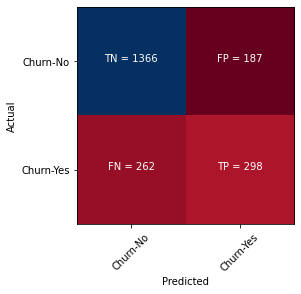

Recall=0.532 
Precision=0.614
F1=0.570
Average precision-recall score: 0.619


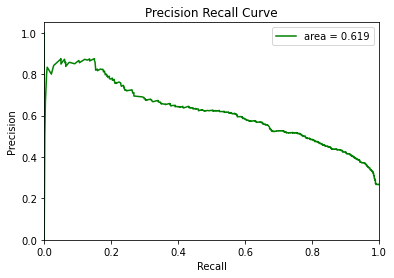

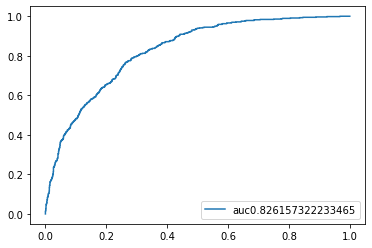


 KNeighborsClassifier 



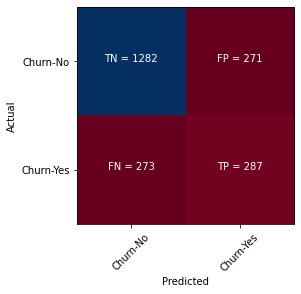

Recall=0.512 
Precision=0.514
F1=0.513
Average precision-recall score: 0.619


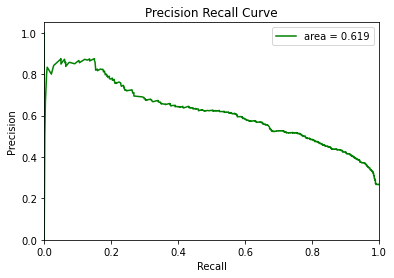

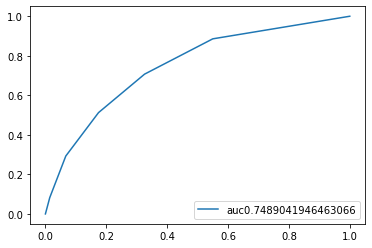


 GaussianNB 



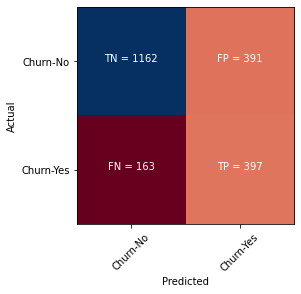

Recall=0.709 
Precision=0.504
F1=0.589
Average precision-recall score: 0.619


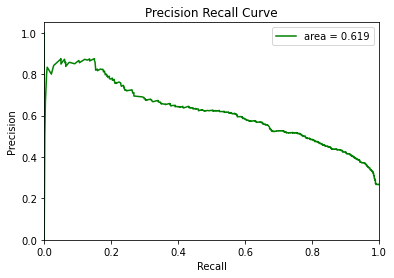

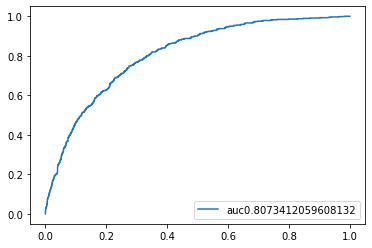

Pred prod cant be calculated

 SVC 



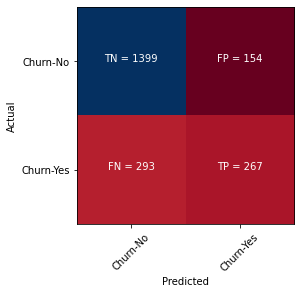

Recall=0.477 
Precision=0.634
F1=0.544
Average precision-recall score: 0.619


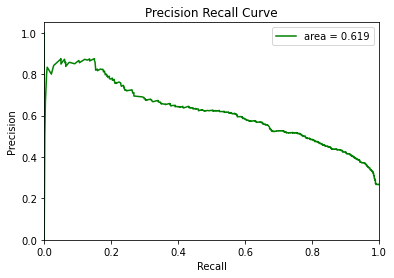

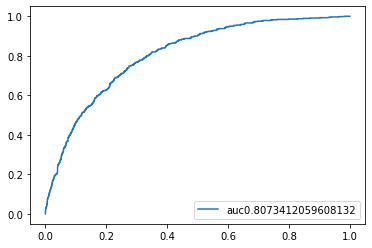


 DecisionTreeClassifier 



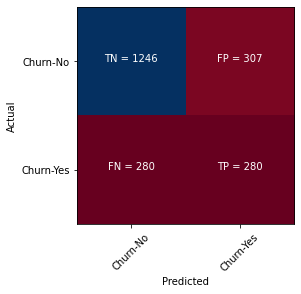

Recall=0.500 
Precision=0.477
F1=0.488
Average precision-recall score: 0.619


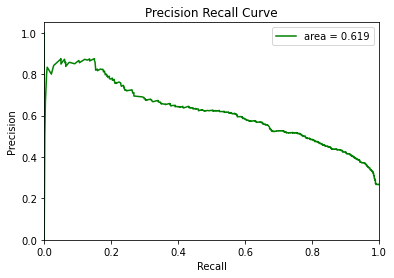

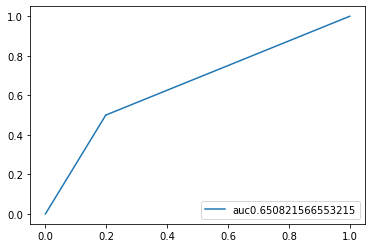


 RandomForestClassifier 



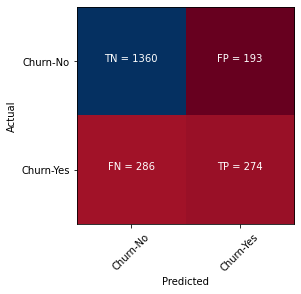

Recall=0.489 
Precision=0.587
F1=0.534
Average precision-recall score: 0.619


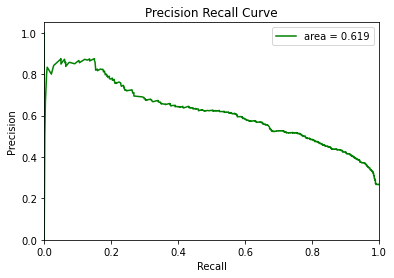

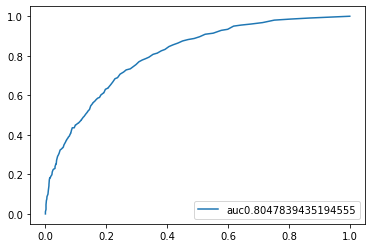

Pred prod cant be calculated

 SGDClassifier 



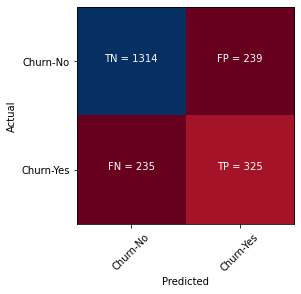

Recall=0.580 
Precision=0.576
F1=0.578
Average precision-recall score: 0.619


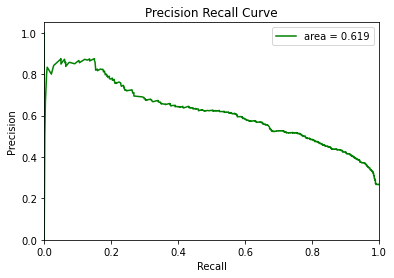

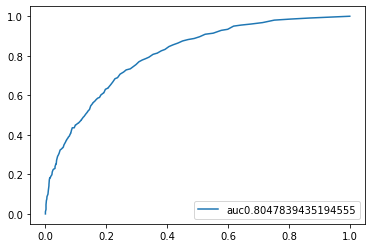


 AdaBoostClassifier 



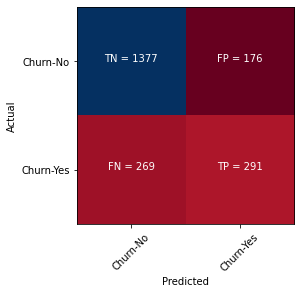

Recall=0.520 
Precision=0.623
F1=0.567
Average precision-recall score: 0.619


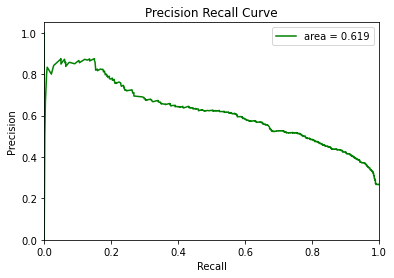

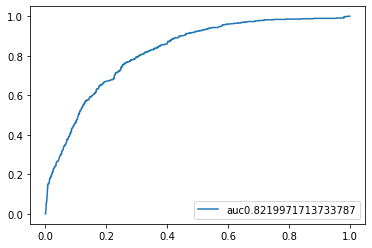

In [302]:
# Making a list of all classifiers
classifier_model = [LogisticRegression(),KNeighborsClassifier(),GaussianNB(),SVC(),DecisionTreeClassifier(),
                        RandomForestClassifier(), SGDClassifier(), AdaBoostClassifier()]

# Creating empty list to store the performance details
classifier_accuracy_test = []
classifier_accuracy_train = []
f1score = []
precisionscore = []
recallscore = []
avg_pre_rec_score = []
cv_score = []
score_test_clf=[]
classifier_model_list=[]

for classifier_name in classifier_model:
    classifier = classifier_name
 
    # Fitting the training set into classification model
    classifier.fit(X_train,y_train)
    
    # Predicting the output on test datset
    y_pred_test = classifier.predict(X_test)  
    try:
        y_pred_proba=classifier.predict_proba(X_test)[::,1]
    except:
        print('Pred prod cant be calculated')
    plot_confusion_matrix(classifier_name.__class__.__name__, y_test, y_pred_test)
    plot_prec_rec_curve(classifier_list.__class__.__name__, y_test, y_pred_score)
    plot_roc_curve(classifier_list.__class__.__name__, y_test,y_pred_proba)
    

In [ ]:
def plot_roc_curve(classifier, y_test, y_pred_proba):
    fpr,tpr,_=metrics.roc_curve(y_test,y_pred_proba)
    auc=metrics.roc_auc_score(y_test,y_pred_proba)
    plt.plot(fpr,tpr,label='auc'+str(auc))
    plt.legend(loc=4)
    plt.show()

### Observations:
- LogisticRegression has given the best accuracy compared to all models followed by AdaBoost and SGDClassifier
- F1 score also seems good for LogisticRegression 